In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('turnstile_200411.txt')

In [2]:
#Remove any leading / trailing spaces from the header
df.rename(columns=lambda x: x.strip(), inplace=True)

#Cast the date from object to datetime and add a new column for the Day
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.strftime('%a')

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205981 entries, 0 to 205980
Data columns (total 12 columns):
C/A         205981 non-null object
UNIT        205981 non-null object
SCP         205981 non-null object
STATION     205981 non-null object
LINENAME    205981 non-null object
DIVISION    205981 non-null object
DATE        205981 non-null datetime64[ns]
TIME        205981 non-null object
DESC        205981 non-null object
ENTRIES     205981 non-null int64
EXITS       205981 non-null int64
DAY         205981 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 18.9+ MB


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,00:00:00,REGULAR,7413507,2516927,Sat
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,04:00:00,REGULAR,7413507,2516927,Sat
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,08:00:00,REGULAR,7413511,2516935,Sat
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,12:00:00,REGULAR,7413521,2516944,Sat
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,16:00:00,REGULAR,7413541,2516953,Sat
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,20:00:00,REGULAR,7413567,2516958,Sat
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,00:00:00,REGULAR,7413584,2516966,Sun
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,04:00:00,REGULAR,7413585,2516968,Sun
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,08:00:00,REGULAR,7413591,2516973,Sun
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,12:00:00,REGULAR,7413597,2516983,Sun


In [4]:
# Data Visualization

#df.TIME.unique()
#df.SCP.value_counts()
#df.STATION.value_counts()
#df.UNIT.value_counts()

In [5]:
# Obtain the hour portion from the timestamp and store as a new integer column
df['Hourval'] = df.TIME.str.slice(0, 2).astype(int)
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,Hourval
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,00:00:00,REGULAR,7413507,2516927,Sat,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,04:00:00,REGULAR,7413507,2516927,Sat,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,08:00:00,REGULAR,7413511,2516935,Sat,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,12:00:00,REGULAR,7413521,2516944,Sat,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,16:00:00,REGULAR,7413541,2516953,Sat,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,20:00:00,REGULAR,7413567,2516958,Sat,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,00:00:00,REGULAR,7413584,2516966,Sun,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,04:00:00,REGULAR,7413585,2516968,Sun,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,08:00:00,REGULAR,7413591,2516973,Sun,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,12:00:00,REGULAR,7413597,2516983,Sun,12


In [6]:
#df['Hourval'].value_counts(sort=False)

In [7]:

#df['ActualEntry'] = df['ENTRIES'] - df['ENTRIES'].shift(1)
#df['ActualExit'] = df['EXITS'] - df['EXITS'].shift(1)

#df = df.sort_values(by=['SCP','DATE'])

# New Columns to calculate the actual entries and exits from the cumulative numbers
# Logic included to set to zero if the SCP is different from the previous entry
# OR if the cumulative amount for the current row is less than the previous row's
df['ActualEntry'] = df['ENTRIES'].diff()
#df.loc[df.SCP != df.SCP.shift(), 'ActualEntry1'] = 0
df.loc[(df['SCP'] != df['SCP'].shift()) | (df['ENTRIES'] < df['ENTRIES'].shift()), 'ActualEntry'] = 0


df['ActualExit'] = df['EXITS'].diff()
#df.loc[df.SCP != df.SCP.shift(), 'ActualEntry1'] = 0



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,Hourval,ActualEntry,ActualExit
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,00:00:00,REGULAR,7413507,2516927,Sat,0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,04:00:00,REGULAR,7413507,2516927,Sat,4,0.0,0.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,08:00:00,REGULAR,7413511,2516935,Sat,8,4.0,8.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,12:00:00,REGULAR,7413521,2516944,Sat,12,10.0,9.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,16:00:00,REGULAR,7413541,2516953,Sat,16,20.0,9.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,20:00:00,REGULAR,7413567,2516958,Sat,20,26.0,5.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,00:00:00,REGULAR,7413584,2516966,Sun,0,17.0,8.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,04:00:00,REGULAR,7413585,2516968,Sun,4,1.0,2.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,08:00:00,REGULAR,7413591,2516973,Sun,8,6.0,5.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,12:00:00,REGULAR,7413597,2516983,Sun,12,6.0,10.0


In [8]:
# Filter data to exclude hours that are too early or late
# Range included is effectively from 6am to 10pm (since 6pm timing includes the 4 hours after) 
df = df[(df.Hourval>=6) & (df.Hourval<=18)]
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,Hourval,ActualEntry,ActualExit
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,08:00:00,REGULAR,7413511,2516935,Sat,8,4.0,8.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,12:00:00,REGULAR,7413521,2516944,Sat,12,10.0,9.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-04,16:00:00,REGULAR,7413541,2516953,Sat,16,20.0,9.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,08:00:00,REGULAR,7413591,2516973,Sun,8,6.0,5.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,12:00:00,REGULAR,7413597,2516983,Sun,12,6.0,10.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-05,16:00:00,REGULAR,7413608,2516997,Sun,16,11.0,14.0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-06,08:00:00,REGULAR,7413636,2517017,Mon,8,1.0,10.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-06,12:00:00,REGULAR,7413648,2517033,Mon,12,12.0,16.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-06,16:00:00,REGULAR,7413678,2517045,Mon,16,30.0,12.0
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-07,08:00:00,REGULAR,7413743,2517058,Tue,8,3.0,9.0


In [9]:
# Check for negatives (which should not exist)
df[(df.ActualEntry < 0) | (df.ActualExit < 0)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,Hourval,ActualEntry,ActualExit


In [10]:
# Check for zeroes (get a sense of the values)
df[(df.ActualEntry == 0) | (df.ActualExit == 0)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,Hourval,ActualEntry,ActualExit
98,A002,R051,02-03-00,59 ST,NQR456W,BMT,2020-04-06,08:00:00,REGULAR,1376450,5179880,Mon,8,0.0,34.0
104,A002,R051,02-03-00,59 ST,NQR456W,BMT,2020-04-07,08:00:00,REGULAR,1376468,5180021,Tue,8,0.0,45.0
116,A002,R051,02-03-00,59 ST,NQR456W,BMT,2020-04-09,08:00:00,REGULAR,1376507,5180241,Thu,8,0.0,20.0
338,A002,R051,02-03-06,59 ST,NQR456W,BMT,2020-04-04,08:00:00,REGULAR,9340403,507309,Sat,8,9.0,0.0
350,A002,R051,02-03-06,59 ST,NQR456W,BMT,2020-04-06,08:00:00,REGULAR,9340542,507317,Mon,8,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-04-09,13:00:00,REGULAR,5554,514,Thu,13,0.0,0.0
205973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-04-09,17:00:00,REGULAR,5554,514,Thu,17,0.0,0.0
205977,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-04-10,09:00:00,REGULAR,5554,514,Fri,9,0.0,0.0
205978,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-04-10,13:00:00,REGULAR,5554,514,Fri,13,0.0,0.0


In [11]:
# New column to calculate the Entry and Exits per 4 hour slot
df['IntervalTotal'] = df['ActualEntry'] + df['ActualExit']

In [12]:
# New column to calculate the daily totals for each station.
df['DailyTotal'] = df.groupby(['STATION','DATE'])['IntervalTotal'].transform('sum')

In [19]:
# New column to calculate the daily totals for each station.
df['WeeklyTotal'] = df.groupby(['STATION'])['IntervalTotal'].transform('sum')

In [25]:
df = df[df.STATION != '46 ST']

In [41]:
# Viewing a subset of the data sorted by DailyTotal in descending order and only the unique values
dfDaily = df[['STATION','DATE','DAY','DailyTotal']].sort_values(by='DailyTotal', ascending=False).drop_duplicates()
dfDaily

,STATION,DATE,DAY,DailyTotal
171298,125 ST,2020-04-06,Mon,15981.0
47024,125 ST,2020-04-08,Wed,15703.0
145554,125 ST,2020-04-07,Tue,15701.0
171617,125 ST,2020-04-10,Fri,15650.0
145734,125 ST,2020-04-09,Thu,14888.0
...,...,...,...,...
70167,AQUEDUCT RACETR,2020-04-09,Thu,7.0
70153,AQUEDUCT RACETR,2020-04-07,Tue,5.0
170698,CENTRAL PK N110,2020-04-04,Sat,4.0
70100,AQUEDUCT RACETR,2020-04-05,Sun,4.0


In [27]:
# Viewing a subset of the data sorted by DailyTotal in descending order and only the unique values
df[['STATION','WeeklyTotal']].sort_values(by='WeeklyTotal', ascending=False).drop_duplicates().nlargest(10, 'WeeklyTotal')

,STATION,WeeklyTotal
46821,125 ST,97986.0
136574,34 ST-PENN STA,69607.0
154526,14 ST-UNION SQ,59824.0
143532,86 ST,54643.0
144614,96 ST,49612.0
159468,GRD CNTRL-42 ST,46138.0
52645,42 ST-PORT AUTH,44512.0
155853,23 ST,42960.0
98867,34 ST-HERALD SQ,41391.0
95185,FULTON ST,40370.0


In [55]:
dfDaily[(dfDaily.STATION == "125 ST")].DailyTotal

171298    15981.0
47024     15703.0
145554    15701.0
171617    15650.0
145734    14888.0
171327    11237.0
171587     8826.0
Name: DailyTotal, dtype: float64

Text(0, 0.5, 'common Y')

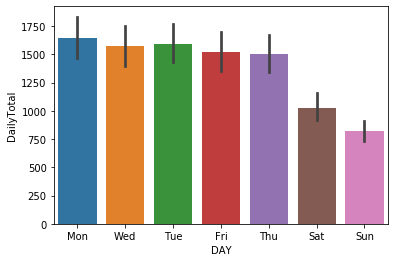

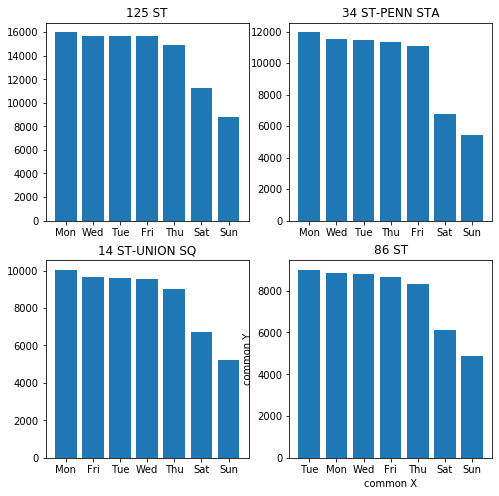

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.distplot(dfDaily['DailyTotal'], kde=False,bins=8,norm_hist=True);
sns.barplot(x = 'DAY',y='DailyTotal',data=dfDaily);

plt.figure(figsize=[8,8])

plt.subplot(2,2,1) # (number of rows, number of columns, number of plot)
plt.bar(dfDaily[(dfDaily.STATION == "125 ST")].DAY, dfDaily[(dfDaily.STATION == "125 ST")].DailyTotal)
plt.title('125 ST')

plt.subplot(2,2,2) # (number of rows, number of columns, number of plot)
plt.bar(dfDaily[(dfDaily.STATION == "34 ST-PENN STA")].DAY, dfDaily[(dfDaily.STATION == "34 ST-PENN STA")].DailyTotal)
plt.title('34 ST-PENN STA')

plt.subplot(2,2,3) # (number of rows, number of columns, number of plot)
plt.bar(dfDaily[(dfDaily.STATION == "14 ST-UNION SQ")].DAY, dfDaily[(dfDaily.STATION == "14 ST-UNION SQ")].DailyTotal)
plt.title('14 ST-UNION SQ')

plt.subplot(2,2,4) # (number of rows, number of columns, number of plot)
plt.bar(dfDaily[(dfDaily.STATION == "86 ST")].DAY, dfDaily[(dfDaily.STATION == "86 ST")].DailyTotal)
plt.title('86 ST');

plt.xlabel("common X")
plt.ylabel("common Y")

In [14]:
#df.groupby(['STATION', 'DATE', 'TIME'])[['ActualEntry']].sum()
#df.groupby(['STATION', 'DATE'])[['ActualEntry']].sum()
#df.groupby(['DATE','STATION'])[['ActualEntry']].sum().sort_values("ActualEntry", axis = 0, ascending = True)

In [51]:
dfDaily[(dfDaily.STATION == "59 ST")]
#dfDaily.groupby(['STATION'])[['DailyTotal']].sum()

,STATION,DATE,DAY,DailyTotal
162942,59 ST,2020-04-06,Mon,5944.0
161989,59 ST,2020-04-08,Wed,5900.0
162403,59 ST,2020-04-07,Tue,5793.0
368,59 ST,2020-04-09,Thu,5510.0
122,59 ST,2020-04-10,Fri,5449.0
163055,59 ST,2020-04-04,Sat,3945.0
345,59 ST,2020-04-05,Sun,3415.0


In [15]:
#df.to_csv (r'temp.csv', index = False, header=True)